In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [5]:
from sklearn.preprocessing import LabelBinarizer
import pickle
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.utils import shuffle


In [6]:
cd signsdata/

/home/manhduy/Documents/model_DL/env_traffic_sign/signsdata


In [7]:
train_data_path = "/home/manhduy/Documents/model_DL/env_traffic_sign/signsdata/train.p"
test_data_path =  "/home/manhduy/Documents/model_DL/env_traffic_sign/signsdata/test.p"
valid_data_path = "/home/manhduy/Documents/model_DL/env_traffic_sign/signsdata/valid.p"

In [8]:
with open(train_data_path, mode="rb") as f:
    train = pickle.load(f)
with open(test_data_path, mode="rb") as f:
    test = pickle.load(f)
with open(valid_data_path, mode="rb") as f:
    valid = pickle.load(f)

In [9]:
train_X = train["features"]
train_Y = train["labels"]

train_X, train_Y = shuffle(train_X, train_Y)

In [10]:
train_X.shape

(34799, 32, 32, 3)

In [11]:
test_X = test["features"]
test_Y = test["labels"]

test_X, test_Y = shuffle(test_X, test_Y)

In [12]:
valid_X = valid["features"]
valid_Y = valid["labels"]

valid_X, valid_Y = shuffle(valid_X, valid_Y)

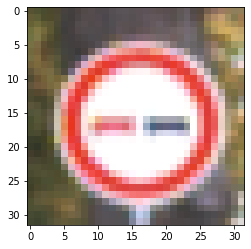

In [13]:
plt.imshow(train_X[0])

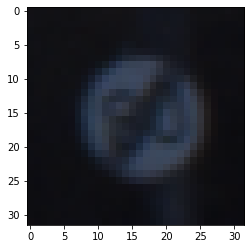

In [14]:
plt.imshow(test_X[1])

In [15]:
len(train_X)

34799

In [16]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [19]:
classNames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [20]:
classNames[test_Y[1]]

'End of speed limit (80km/h)'

In [21]:
train_X = train_X.astype("float") / 255.0
test_X = test_X.astype("float") / 255.0
valid_X = valid_X.astype("float") / 255.0

In [22]:
lb = LabelBinarizer()

In [23]:
train_Y = train_Y.reshape((train_Y.shape[0], 1))

In [24]:
train_Y = lb.fit_transform(train_Y)
valid_Y = lb.fit_transform(valid_Y)
test_Y = lb.fit_transform(test_Y)

In [25]:
classes = 43
input_shape = (32,32, 3)

### Model

In [26]:
model = Sequential()

model.add(Conv2D(32, (3 , 3), padding='same', input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation("softmax"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [28]:
learning_rate = 1e-2
batch_size = 64
num_epochs = 10 # Accuracy: 74% within 30 epochs

In [29]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### fit data vao model 

In [30]:
# H = model.fit_generator(aug.flow(train_X, train_Y, batch_size=batch_size), validation_data=(valid_X, valid_Y), 
#                         steps_per_epoch=train_X.shape[0] // batch_size, epochs=num_epochs, verbose=1)

In [31]:
# model.save('saved_model_traffic_sign.h5')

In [32]:
model.load_weights('/home/manhduy/Documents/model_DL/env_traffic_sign/saved_model_traffic_sign.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [33]:
def train_model_show(history):
    fig, (sub1,sub2) = plt.subplots(1, 2,figsize = (20, 5))
    sub1.plot(history.history['loss'], label = 'Train_loss')
    sub1.plot(history.history['val_loss'], label = 'Val_loss')
    sub1.set_title('Train and val loss')
    sub1.set_ylabel('loss')
    sub1.set_label('epochs')
    sub1.legend()
    
    sub2.plot(history.history['loss'], label = 'Train_loss')
    sub2.plot(history.history['val_loss'], label = 'Val_loss')
    sub2.set_title('Train and val loss')
    sub2.set_ylabel('loss')
    sub2.set_label('epochs')
    sub2.legend()
    plt.show()

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np 

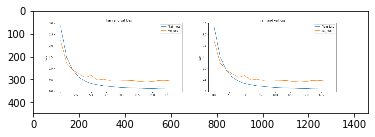

In [38]:
# train`_model_show(H)
img= mpimg.imread('/home/manhduy/Documents/model_DL/env_traffic_sign/history_train_traffic_sign.png')

plt.imshow(img)

plt.show()

In [68]:
result = model.predict(np.array(test_X[100:120]))

In [69]:
def one_hot_coding(one_hot_array):
    index_max= np.where(one_hot_array == np.amax(one_hot_array))
    return index_max[0]

In [70]:
result.shape

(20, 43)

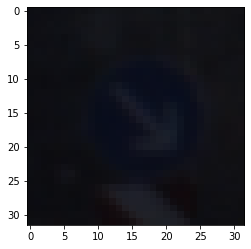

In [71]:
plt.imshow(test_X[2])

In [72]:
print(one_hot_coding(result[2]))

[12]


In [73]:
answer = []
for i in range(result.shape[0]): 
    answer.append(one_hot_coding(result[i])[0])
# answer


In [75]:
answer

[38, 36, 12, 0, 13, 3, 1, 1, 25, 2, 17, 22, 2, 17, 5, 10, 2, 28, 36, 3]

In [133]:
def show_data(array,n):
    fig = plt.figure(figsize=(15, 15))
    for i in range(1,n+1): 
        img = train_X[array[i]]
        ax = fig.add_subplot(2, 5, i)
        ax.set_title(classNames[array[i]])
        plt.imshow(img)
        


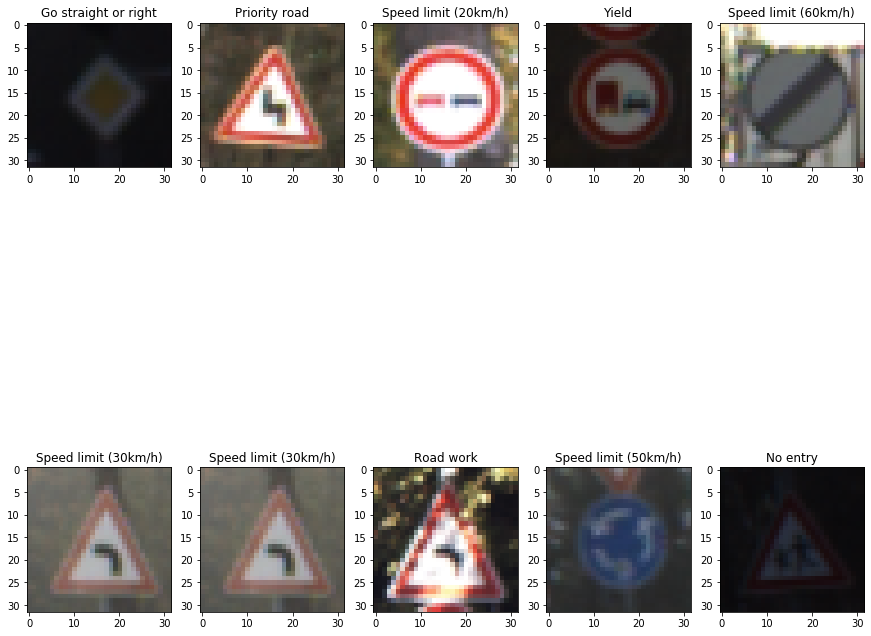

In [134]:
show_data(answer,10)

### Đây là History  của bài classification, em thử thay đổi Learning rate với cấu trúc model nhưng ko hiểu sao, khi predict model lại quá tệ. 
vì vậy nên em thử một số phương pháp mới. có gì em sẽ public nốt code sau 

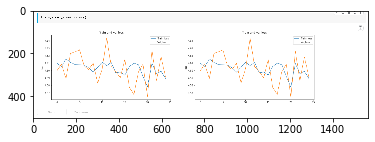

In [138]:
# train`_model_show(H)
img= mpimg.imread('/home/manhduy/Documents/model_DL/env_traffic_sign/model_with_25epoch.png')

plt.imshow(img)
